# **Image Captioning with `Flickr30k`**


### **Introduction - `Image Captioning`**

> Image Captioning is the task of `describing the content of an image in words`. 

* `Image Captioning` is like teaching a computer to describe a picture in words. It’s like when you look at a photo and tell a friend what’s happening in it. 

* `For example`, you might see a photo and say, "A dog is playing with a ball in the park." That’s what we want the computer to do!

* This task lies at the intersection of `Computer Vision` and `Natural Language Processing`. 

* Most Image Captioning systems use an `encoder-decoder framework`, where an `input image` is `encoded` into an intermediate representation of the information in the image, and then `decoded` into a `descriptive text sequence`. 

![Image](https://petapixel.com/assets/uploads/2016/09/Caption1-800x450.jpg)

'''

### **How it Works?**

Here’s how it works:

1. **`Seeing the Picture`** 
* The computer uses something called a `Convolutional Neural Network (CNN)`. 
* This is a type of `Artificial Intelligence` that’s really good at understanding images. 
* It can `identify` objects, colors, shapes, and sometimes even actions.

2. **`Understanding the Picture`** 
* The `CNN` turns the image into a bunch of `numbers` that represent all the things it sees. 
* This is called `Encoding`. 
* It’s like creating a secret code that describes everything in the picture.

3. **`Describing the Picture`** 
* The computer then uses another type of `Artificial Intelligence` called a `Long Short-Term Memory (LSTM)` to turn that code into a sentence. 
* This is called `Decoding`. 
* The `LSTM` is good at understanding language and how words fit together to make meaningful sentences.

4. **`Result`**
* The end result is a sentence that describes what’s happening in the `Image`.

![Image](https://www.researchgate.net/publication/363528474/figure/fig1/AS:11431281084306774@1663121984744/Block-diagram-of-an-image-captioning-model-using-deep-learning-encoder-decoder-framework.jpg)


* This process has many potential applications in real life. A noteworthy one would be to help visually impaired people by describing images to them. 

* It can also be used to automatically add captions to images online, which can make searching for specific images easier.


'''

### **Goal of the Day**

* Here, we will build and Train an `Image Captioner` from `scratch` that will be used to `Describe the Image` Input in a sentence.


'''

### **Process**

* [A. Preparing Dataset](#1)
* [B. Building and Training Model](#2)
* [C. Predicting Captions from Images](#3)

*** 
***

## **A. Preparing Dataset** <a id="1"></a>

* First step is to `find` a suitable `dataset` and `prepare` it `for` Training our `Image Captioner` model.

Here are some `datasets` that are commonly used for `Image Captioning` tasks:

1. **`Flickr 8K`** 

* This dataset contains a total of `8092 images` in `JPEG` format with different shapes and sizes. 
* Of which `6000` are used for training, `1000` for test and `1000` for validation. 
* Each image is paired with `five different captions`.

2. [Flickr30k](https://www.kaggle.com/datasets/eeshawn/flickr30k/data) 

* The [Flickr30k](https://www.kaggle.com/datasets/eeshawn/flickr30k/data) dataset contains `31,000 images` collected from Flickr, together with `5 reference sentences` provided by human annotators.

3. **`MS COCO`** 

* The MS COCO `(Microsoft Common Objects in Context)` dataset is a large-scale object detection, segmentation, key-point detection, and `captioning` dataset.
* The dataset consists of `328K images`.

4. **`RSICD`** 

* The `Remote Sensing Image Captioning Dataset` (RSICD) is a dataset for remote sensing image captioning task. 
* It contains more than `10,000 remote sensing images` which are collected from Google Earth, Baidu Map, MapABC and Tianditu. 
* The images are fixed to `224X224 pixels` with various resolutions. 
* The total number of remote sensing images is `10921`, with `five sentences descriptions` per image.

'

* Each of these datasets has its own unique characteristics and can be used depending on the specific requirements of any project.

'''

### **1. Downloading Dataset**

* In this project, we will use the [Flickr30k](https://www.kaggle.com/datasets/eeshawn/flickr30k/data) `Dataset`.

* Simply `Download` the dataset from kaggle and `extract` it in your current directory.

![Image](https://storage.googleapis.com/kaggle-datasets-images/908492/1540510/ac69933ad31346d4d18cb1f1998139b7/dataset-cover.png?t=2020-10-07-03-10-11)

'''

### **2. Image Features Extraction**

* In Deep Learning, we often use a concept called `Feature Extraction` to help us `understand` and `interpret images`. 

* This is a process where we use a `Pre-trained Model` (a model that has already been trained on a large dataset) to `identify` and `extract` important characteristics or `Features` from an `image`.

* Imagine you’re looking at a picture of a dog. As a human, you can easily identify `features` such as the dog’s eyes, ears, nose, and tail. These are the things that make the dog recognizable to you. 

* In Deep Learning, `Feature Extraction` works in a similar way. The model looks at an `image` and identifies the important `features` that help it `recognize` what’s in the `image`.

Here’s how it works:

1. **`Input Image`** 

* We start with an `image`. 
* This could be anything from a photo of a person to a satellite image of a city.

2. **`Pre-Trained Model`** 

* We then pass this image through a `Pre-trained Model`. 
* This model has been `trained` on millions of images and has `learned to recognize` thousands of different objects and `features`.

3. **`Feature Extraction`** 

* As the image passes through the model, each `layer` of the model looks for `different features`. 
* `Early layers` might look for `simple` things like edges and colors, while `later layers` look for more `complex features` like shapes or specific objects.

4. **`Output`** 

* The output of this process is a `set of features` that represent the `content of the image`. 
* These features can then be used for `various tasks`, such as image classification (determining what objects are in an image) or object detection (locating where those objects are in the image).


'

* So, in simple terms, `Feature Extraction` in deep learning is like giving the computer a pair of eyes and teaching it to see and understand images just like we do! Isn’t that fascinating? 😊
* Let's begin with `Image Feature Extraction`.

##### **Image `Directories`**

* Set `IMAGES_INPUT_DIR` as the directory where all the `Images` from the `dataset` are stored, and `IMAGES_OUTPUT_DIR` as the directory where the `Extracted features` will be stored.

* The `Extracted Features` will be saved as a single `pickle file`.

In [ ]:
import os
from tqdm import tqdm

IMAGES_INPUT_DIR = "./Flickr30k_Dataset/flickr30k_images/"
IMAGES_OUTPUT_DIR = "./Flickr30k_Dataset_preprocessed/"

##### **Loading `VGG16`**

* `VGG16` is a `Convolutional Neural Network` (CNN) that is `16` layers deep. It’s a `Pre-trained Model`, which means it has already been trained on a large dataset called `ImageNet`. 

* `ImageNet` contains over `14 million images` belonging to `1000 classes`, so `VGG16` has learned to `recognize` a wide variety of `features` from these `images`.


* We will load the Pre-trained `VGG16` model from [Keras](https://keras.io/).

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model


# Load the vgg16 model
model = VGG16()

# Restructuring the model to remove the last classification layer
# This will give us access to the output features of the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Below in the `Model Summary` is a breakdown of the layers:

1. **`InputLayer`** 

* This is the input to the network. 
* `Images` are expected to be `224x224` pixels with `3` color channels `(RGB)`.

2. **`Conv2D Layers`** 

* These are `Convolutional Layers` that will learn local patterns in the input image. 
* The numbers `64, 128, 256, and 512` represent the number of `filters` in each layer. 
* The more `filters`, the more `complex patterns` the model can `learn`.

3. **`MaxPooling2D Layers`** 

* These layers `reduce` the spatial dimensions `(width and height)` of the input volume. 
* They are used to `decrease` computational complexity and `prevent overfitting`.

4. **`Flatten Layer`** 

* This layer `flattens` the input into a `single dimension vector` which can be fed into Fully Connected Layers.

5. **`Dense Layers (fc1 and fc2)`** 

* These are `Fully Connected Layers` where every `neuron` in the layer is `connected` to every neuron in the previous layer. 
* The numbers `4096` represent the number of `neurons` in each layer.

![Image](https://static.packt-cdn.com/products/9781838827069/graphics/assets/0c28bb91-62aa-4165-a1fe-210d6ab63859.png)

'

* The total number of `parameters` in this model is approximately `134 million`, which indicates that this is a very large and complex model. 

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

##### **Extracting `Features` from Images**

In the code below, Here’s a brief explanation of what each part does:

1. **`Initialize an empty dictionary to store image features`** 

* This creates an empty dictionary where the `keys` will be the image IDs and the `values` will be the extracted features.

2. **`Define the directory path where images are located`** 

* This sets the path to the directory containing the `images`.

3. **`Loop through each image in the directory`** 

* This iterates over each image file in the specified directory.

4. **`Load the image from file`** 

* This loads each image file, resizing it to `224x224` pixels, which is the input size expected by `VGG16`.

5. **`Convert image pixels to a numpy array and reshape`** 

* This converts the image data into a format that can be input into the `VGG16` model.

6. **`Preprocess the image for VGG16`** 

* This applies any necessary `Pre-processing` to the image data, such as scaling pixel values.

7. **`Extract features using the pre-trained VGG16 model`** 

* This passes the preprocessed image data through the VGG16 model to `extract` features.

8. **`Get the image ID by removing the file extension`** 

* This extracts the ID of each image from its filename.

9. **`Store the extracted feature in the dictionary with the image ID as the key`** 

* This stores each extracted feature vector in the dictionary, using the corresponding `image ID` as its key.

In [ ]:
# Initialize an empty dictionary to store image features
image_features = {}

# Define the directory path where images are located
img_dir = IMAGES_INPUT_DIR

In [ ]:
# Loop through each image in the directory
for img_name in tqdm(os.listdir(img_dir)):
    # Load the image from file
    img_path = os.path.join(img_dir, img_name)
    image = load_img(img_path, target_size=(224, 224))
    # Convert image pixels to a numpy array
    image = img_to_array(image)
    # Reshape the data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # Preprocess the image for ResNet50
    image = preprocess_input(image)
    # Extract features using the pre-trained ResNet50 model
    image_feature = model.predict(image, verbose=0)
    # Get the image ID by removing the file extension
    image_id = img_name.split('.')[0]
    # Store the extracted feature in the dictionary with the image ID as the key
    image_features[image_id] = image_feature


100%|██████████| 31783/31783 [6:47:40<00:00,  1.30it/s]  


##### **`Storing` Image Features**

* Next, we will simply `dump (save)` the `Extracted Image Features` into a `Pickle` file to use it later.

In [ ]:
import pickle

pickle.dump(image_features, open(os.path.join(IMAGES_OUTPUT_DIR, 'img_features.pkl'), 'wb'))

'''

### **3. Pre-processing Captions Data**

* In Deep Learning, especially in tasks like `Image Captioning`, we often need to work with `Text` data, such as the captions that describe the content of images. 

* This text data needs to be `Pre-processed` before it can be used to train a model. 

Here’s how it works:

1. **`Loading Data`** 

* The first step is to load the captions data. 
* This could be a file where each line contains an `Image Identifier` and a Caption.

2. **`Text Cleaning`** 

* The captions are usually cleaned by converting all text to `lowercase`, `removing` punctuation, and sometimes removing words that occur very infrequently.

3. **`Tokenization`** 

* The cleaned captions are then broken down into `individual` Words, or `Tokens`. 
* This process is called tokenization.

4. **`Building Vocabulary`** 

* We then build a vocabulary of all the `unique` words in the captions. 
* This vocabulary is used to create a `mapping` from words to `Numerical Identifiers`.

5. **`Text Encoding`** 

* The captions are then encoded using this mapping, `replacing` each word in the caption with its corresponding `Numerical Identifier`. 
* This transforms the text data into a format that the model can understand.

6. **`Padding Sequences`** 

* Since Neural Networks require input data to be in a consistent `format`, we ensure all `Encoded` Captions have the same length by padding shorter sequences with a special `Padding` value.

7. **`Splitting Data`** 

* Finally, the dataset is usually split into `Training` and `Validation` sets. 
* The training set is used to `train` the model, and the validation set is used to `evaluate` its performance.

![Image](https://th.bing.com/th/id/R.64f89df124d01a5c83b1ef5022736332?rik=l2%2f0HTP%2fra3K5w&riu=http%3a%2f%2fbennycheung.github.io%2fimages%2fdeep-learning-on-text-data%2ftext_preprocessing_workflow.jpg&ehk=txbTdsdDdf8%2bkEYHae4ezrjtIopg8XNxBzeC6GO9Tf0%3d&risl=&pid=ImgRaw&r=0)


'

* So, in simple terms, `Pre-processing` captions data in Deep Learning is like `translating` human language into a language that computers can understand.

##### **Mounting Google Drive**

* I will `upload` `Extracted Features` pickle `file` and the `Captions` text file from the dataset to the `Google Drive` after which I will be mounting my Google Drive to the `Google Colab` as seen below.

* I am doing this since this will allow me `train` my model on `faster GPUs` available on Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Loading `Captions` Data**

* First, we import `tqdm`, a library in python that helps us `track progress`.

* Then, we read the `Caption` Data that is stored as a `.txt file`.

In [2]:
import os
from tqdm import tqdm


CAPTION_INPUT_DIR = "/content/drive/My Drive/Flickr30k_Dataset/captions.txt"

with open(CAPTION_INPUT_DIR, 'r') as file:
    next(file)
    captions_doc = file.read()

##### **`Mapping` Images to Captions**

* This simple code below is creating a `mapping` of `images` to their `corresponding captions`. 

Here’s what each part of the code does:

1. **`from collections import defaultdict`** 

* This line imports the `defaultdict class` from the collections module. 
* A defaultdict is a type of `dictionary` in Python that provides a default value for a key that does not exist.

2. **`image_to_captions_mapping = defaultdict(list)`** 

* This line creates a defaultdict where each `key` (which will be an `image ID`) maps to a list of `captions`.

3. **`The for loop`**

* The `for` loop `processes` each line from the `captions_doc`, which is assumed to be a string where each line contains an `image ID` followed by its `captions`, separated by commas.

4. **`tokens = line.split(',')`** 

* This line `splits` the line into `tokens` using the comma as a separator. The `first` token is the `image ID`, and the `remaining` tokens are the `captions`.

5. **`if len(tokens) < 2: continue`** 

* This line `skips` any lines that do not have `at least two tokens` (an image ID and at least one caption).

6. **`image_id, *captions = tokens`** 

* This line uses Python’s `unpacking` feature to assign the `first` token to `image_id` and all `remaining` tokens to `captions`.

7. **`image_id = image_id.split('.')[0]`** 

* This line `removes` the `extension` from the image ID.

8. **`caption = " ".join(captions)`** 

* This line `joins` all the `captions` into a single `string`, with spaces in between.

9. **`image_to_captions_mapping[image_id].append(caption)`** 

* This line `appends` the `caption` to the `list` of captions for the current image ID in the `defaultdict`.

'

* So, in simple terms, this code is creating a `dictionary` where each `key` is an `image ID`, and each `value` is a list of `captions` for that image! 

In [3]:
from collections import defaultdict

# Create mapping of image to captions
image_to_captions_mapping = defaultdict(list)

In [4]:
# Process lines from captions_doc
for line in tqdm(captions_doc.split('\n')):
    # Split the line by comma(,)
    tokens = line.split(',')
    if len(tokens) < 2:
        continue
    image_id, *captions = tokens
    # Remove extension from image ID
    image_id = image_id.split('.')[0]
    # Convert captions list to string
    caption = " ".join(captions)
    # Store the caption using defaultdict
    image_to_captions_mapping[image_id].append(caption)

100%|██████████| 158916/158916 [00:00<00:00, 681062.26it/s]


* We get total number of `captions` to be over `150k`, and since there are over `30k` `images`, it means 5 captions per image.

In [5]:
# Print the total number of captions
total_captions = sum(len(captions) for captions in image_to_captions_mapping.values())
print("Total number of captions:", total_captions)

Total number of captions: 158915


##### **Pre-processing `Function`**

* This code defines a function named clean that processes the captions in a mapping of image IDs to captions. 

Here’s what each part of the code does:

1. **`def clean(mapping):`** 

* This line defines the `function` clean that takes one argument, `mapping`, which is a `dictionary` where each key is an `image ID` and each value is a list of captions for that image.

2. **`The outer for loop`** 

* This iterates over each `key-value pair` in the mapping. 
* The key is an image ID and captions is the list of captions for that image.

3. **`The inner for loop`** 

* This iterates over each `caption` in the `list` of captions for the current image.

4. **`caption = captions[i]`** 

* This line gets the current `caption` from the list.

5. **`caption = caption.lower()`** 

* This line converts the caption to `lowercase`.

6. **`caption = ''.join(char for char in caption if char.isalpha() or char.isspace())`** 

* This line `removes` any characters from the caption that are `not alphabetic` or `whitespace`.

7. **`caption = caption.replace('\s+', ' ')`** 

* This line `replaces` any sequence of one or more `spaces` in the caption with a single space.

8. **`caption = 'startseq ' + ' '.join([word for word in caption.split() if len(word) > 1]) + ' endseq'`** 

* This line adds a special `startseq` token to the beginning of the caption and an `endseq` token to the end. 
* It also removes any single-character words from the caption.

9. **`captions[i] = caption`** 

* This line `replaces` the original caption in the list with the cleaned and `processed` caption.

'

* So, in simple terms, this function `cleans` and `processes` the `captions` for each image in a mapping.

In [6]:
# Function for processing the captions
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # Take one caption at a time
            caption = captions[i]
            # Preprocessing steps
            # Convert to lowercase
            caption = caption.lower()
            # Remove non-alphabetical characters
            caption = ''.join(char for char in caption if char.isalpha() or char.isspace())
            # Remove extra spaces
            caption = caption.replace('\s+', ' ')
            # Add unique start and end tokens to the caption
            caption = 'startseq ' + ' '.join([word for word in caption.split() if len(word) > 1]) + ' endseq'
            captions[i] = caption

##### **`Trying` Pre-process `(clean)` Function on a single `Sample`**

* We do this by passing an `image ID` into the function we just created.

In [7]:
image_to_captions_mapping['36979']

['0 A group of friends playing cards and trying to bluff each other into making a terrible mistake .',
 '1 A group of college students gathers to play texas hold em poker .',
 '2 Several men play cards while around a green table .',
 '3 A group of several men playing poker .',
 '4 Six white males playing poker .']

In [8]:
# preprocess the text
clean(image_to_captions_mapping)

In [9]:
# after preprocess of text
image_to_captions_mapping['36979']

['startseq group of friends playing cards and trying to bluff each other into making terrible mistake endseq',
 'startseq group of college students gathers to play texas hold em poker endseq',
 'startseq several men play cards while around green table endseq',
 'startseq group of several men playing poker endseq',
 'startseq six white males playing poker endseq']

* It's working as intended.

##### **Creating a `List` of all Captions**

* Let's now quickly create a `list` of all the captions.

In [10]:
# Creating a List of All Captions 
all_captions = [caption for captions in image_to_captions_mapping.values() for caption in captions]

In [11]:
all_captions[:10]

['startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq',
 'startseq two young white males are outside near many bushes endseq',
 'startseq two men in green shirts are standing in yard endseq',
 'startseq man in blue shirt standing in garden endseq',
 'startseq two friends enjoy time spent together endseq',
 'startseq several men in hard hats are operating giant pulley system endseq',
 'startseq workers look down from up above on piece of equipment endseq',
 'startseq two men working on machine wearing hard hats endseq',
 'startseq four men on top of tall structure endseq',
 'startseq three men on large rig endseq']

##### **`Tokenizing` the Text**

* Next, we will `Tokenize` our Text.
* In this project, we will use the `Tokenizer` from `keras.preprocessing.text` in simple terms:

* The `Tokenizer` is a class in the `Keras` library that is used to `convert` text into sequences of `integers`. It’s a part of `text preprocessing` in Natural Language Processing (NLP) and deep learning.

* The `Tokenizer` works by assigning a unique `integer` to each `word` in the text. The most frequent words get lower integers. This process is known as `tokenization`.

* Computers don’t understand text like humans do. They understand numbers. So, we need to convert text into numbers so that our machine learning or deep learning models can work with them3.

* Key `Methods` of Tokenizer:

1. **`fit_on_texts()`**: This method updates the `tokenizer’s` internal `vocabulary` based on a list of texts. It creates a `dictionary` where every unique word gets a unique integer value.
    
2. **`texts_to_sequences()`**: This method transforms each text in texts to a `sequence` of integers. It takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.

* You almost always `fit` once and convert to sequences many times. You will fit on your `training` corpus once and use that exact same `word_index` dictionary at train/eval/testing/prediction time to convert actual text into sequences to feed them to the network.

![Image](https://miro.medium.com/max/1740/1*B8ZCmRvTeCRq_KkVugNnwQ.png)


This code is used to `tokenize` the text data. Here’s a brief explanation:

1. **`Import the Tokenizer`**: 

* The first line `imports` the Tokenizer class from Keras, which is a Python library for deep learning.

2. **`Initialize the Tokenizer`**: 

* The Tokenizer() function initializes a `new instance` of the `Tokenizer` class. 
* This tokenizer object will be used to perform the tokenization.

3. **`Fit the Tokenizer on Texts`**: 

* The `fit_on_texts`() function is then called on the all_captions list. 
* This function `updates` the tokenizer’s internal `vocabulary` based on the list of texts it is given. 
* In other words, it scans through all the `words` in all_captions, and creates an `index` of all unique words.

'

* After this code is run, each `word` in all_captions will be mapped to a unique `integer ID`, allowing text data to be easily used by machine learning algorithms.

In [12]:
from keras.preprocessing.text import Tokenizer

# Tokenizing the Text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

##### **`Saving` the Tokenizer**

* Now we simply `dump` (save) the `Tokenizer` as a pickle file and then load it.

In [13]:
import pickle

# Save the tokenizer
with open('/content/drive/My Drive/Model/tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Load the tokenizer
with open('/content/drive/My Drive/Model/tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

##### **Max Caption `Length`**

* This code calculates and prints the `maximum length` of the tokenized captions. 

* It tokenizes each caption in `all_captions`, calculates its length, and keeps track of the longest one. 

* The result is stored in `max_caption_length`. 

* This value represents the `longest caption` in terms of the number of tokens. 

* It’s useful for setting the `sequence length` for model inputs.

In [14]:
max_caption_length = max(len(tokenizer.texts_to_sequences([caption])[0]) for caption in all_captions)
print("Maximum Caption Length:", max_caption_length)

Maximum Caption Length: 74


##### **`Vocab` Size**

* This code calculates and prints the `size` of the `vocabulary`. 

* The tokenizer.word_index is a `dictionary` where `words` are `keys` and their corresponding `tokens` are `values`. 

* The len() function gives the number of `unique` words. We add 1 to account for the `‘0’` padding token. 

* The result is stored in `vocab_size`.

In [15]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 19750


'''

### **4. Train-Test Split**

* This is the last step in `Preparing Dataset`.

* `Train-Test Split` is a technique used in machine learning to evaluate the performance of a model. It involves `dividing` your dataset into two subsets: a training set and a test set.

* The main purpose of the train-test split is to `assess` how well your model will `perform` on `unseen` data. It helps simulate how your model would perform with new data.

* The dataset is divided into two parts. The `larger` part (often 70-80% of the dataset) is used for `training` the model, and the `smaller` part (often 20-30%) is used for `testing` the model.

* The `training` set is used to train the model. This means that the model `learns` from this data.

* The `test` set is used to `evaluate` the performance of the model. It provides an unbiased evaluation of the final model fit.

* In Python, you can use the `train_test_split`() function from sklearn.model_selection to split your data into training and testing sets.

* One challenge in train-test split is ensuring that both training and test sets are representative of the overall population. There’s also a risk of `overfitting` if the training set is too `small`, or `underfitting` if it’s too `large`.

![Image](https://elitedatascience.com/wp-content/uploads/2017/06/Train-Test-Split-Diagram.jpg)


Here is how the code below works - 

1. **`Creating a List of Image IDs`** 

* The `image_to_captions_mapping.keys`() function gets all the `keys` (which are image IDs) from the image_to_captions_mapping `dictionary`. 
* The list() function then `converts` these keys into a `list`, which is stored in image_ids.

2. **`Calculating the Split Point`** 

* The len(image_ids) * 0.90 calculates `90%` of the total number of image IDs. 
* The `int`() function `rounds` this number to the nearest whole number. 
* This value is stored in split and represents the point where the list will be `split` into training and test sets.

3. **`Creating the Training Set`** 

* The `image_ids[:split]` takes all items in the list from the start up to (but not including) the index specified by split. 
* These items form the `training` set.

4. **`Creating the Test Set`** 

* The `image_ids[split:]` takes all items in the list from the index specified by split to the end of the list. 
* These items form the `test` set.

'

* So, this code `splits` your image IDs into a `training` set containing `90%` of the data and a `test` set containing the remaining `10%`. 

In [16]:
# Creating a List of Image IDs
image_ids = list(image_to_captions_mapping.keys())

In [17]:
# Splitting into Training and Test Sets
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

##### **`Data Generator` Function**

* A `Data Generator` is a technique used in deep learning to provide `batches` of data on-the-fly while `training` a neural network. It’s particularly useful when dealing with `large datasets` that cannot fit entirely in memory.

* When working with `large datasets`, loading the entire dataset into `memory` isn’t feasible due to hardware limitations. `Data Generators` allow us to `load and preprocess` data on the fly, just in time for use by the deep learning model. This means we can work with large datasets regardless of our system’s memory `capacity`.

* `Data Generators` work by `loading` a batch of data, `preprocessing` it, and `feeding` it to the model for `training`. Once the model has processed the batch, the Data Generator loads the `next batch`, and so on. This continues until the model has been trained on the entire dataset.

* They are `efficient` as they only load what is needed at the moment, saving memory. They can also be used to perform `data augmentation` on-the-fly, creating variations of the training data and helping improve model performance.

* In `Keras`, you can use methods like `model.fit_generator`(), `model.evaluate_generator`(), etc., that can use a custom data generator.

'

Here is a simple explanation of the `custom Data Generator` we will be using to `train` our model as seen below: 

1. **`Initialize Batch Data`**: It starts by initializing `empty lists` to store the batch data and a counter for the batch size.

2. **`Loop Through Images`**: For each `image ID` in the provided `keys`, it retrieves the associated `captions`.

3. **`Tokenize Captions`**: Each caption is `converted` into a sequence of `tokens` (numeric representations of words).

4. **`Create Input-Output Pairs`**: For each `token` in the sequence, it creates an `input-output pair`. The `input` sequence is all tokens up to the current one, and the `output` is the current token.

5. **`Pad Input Sequences`**: It `pads` the input sequence to ensure it has a consistent `length`.

6. **`One-Hot Encode Output Sequences`**: The `output` sequence is converted into a `one-hot encoded` format, which is a binary representation used for categorical data.

7. **`Append Data to Batch`**: It `appends` the image features, input sequence, and output sequence to their respective lists.

8. **`Check Batch Size`**: If the `batch size` reaches the specified limit, it yields the batch data as `numpy arrays` and resets the lists and counter for the next batch.

* This function continues to `generate batches` indefinitely due to the `while` True loop, making it suitable for training deep learning models.

In [18]:
## Function for padding sequences to a specific length
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Data generator function
def data_generator(data_keys, image_to_captions_mapping, features, tokenizer, max_caption_length, vocab_size, batch_size):
    # Lists to store batch data
    X1_batch, X2_batch, y_batch = [], [], []
    # Counter for the current batch size
    batch_count = 0

    while True:
        # Loop through each image in the current batch
        for image_id in data_keys:
            # Get the captions associated with the current image
            captions = image_to_captions_mapping[image_id]

            # Loop through each caption for the current image
            for caption in captions:
                # Convert the caption to a sequence of token IDs
                caption_seq = tokenizer.texts_to_sequences([caption])[0]

                # Loop through the tokens in the caption sequence
                for i in range(1, len(caption_seq)):
                    # Split the sequence into input and output pairs
                    in_seq, out_seq = caption_seq[:i], caption_seq[i]

                    # Pad the input sequence to the specified maximum caption length
                    in_seq = pad_sequences([in_seq], maxlen=max_caption_length)[0]

                    # Convert the output sequence to one-hot encoded format
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # Append data to batch lists
                    X1_batch.append(features[image_id][0])  # Image features
                    X2_batch.append(in_seq)  # Input sequence
                    y_batch.append(out_seq)  # Output sequence

                    # Increase the batch counter
                    batch_count += 1

                    # If the batch is complete, yield the batch and reset lists and counter
                    if batch_count == batch_size:
                        X1_batch, X2_batch, y_batch = np.array(X1_batch), np.array(X2_batch), np.array(y_batch)
                        yield [X1_batch, X2_batch], y_batch
                        X1_batch, X2_batch, y_batch = [], [], []
                        batch_count = 0

***
***

## **B. Building and Training Model** <a id="2"></a>

* After Preparing our Dataset, we will now `Build` and `Train` our custom Image Captioner Model.

'''

### **1. LSTM Model**

* LSTM (`Long Short-Term Memory`) is a type of `Recurrent Neural Network` (RNN) architecture that is widely used in Deep Learning. It’s specifically designed to handle `sequential data`, such as time series, speech, and text.

* Traditional `RNNs` have difficulty learning `long-term` dependencies due to the vanishing `gradient` problem. LSTMs address this issue by introducing a `memory cell` that can retain information for an extended period of time.

* `LSTMs` have a chain-like structure that contains `four` neural networks and different `memory blocks` called cells. These cells retain information and the memory manipulations are done by `three` gates: the `input` gate, the `forget` gate, and the `output` gate. These gates decide what information to add to, remove from, and output from the memory cell.

1. `Input Gate`: Controls what information is `added` to the memory cell.
2. `Forget Gate`: Controls what information is `removed` from the memory cell.
3. `Output Gate`: Controls what information is `output` from the memory cell.

* `LSTMs` excel at capturing long-term dependencies, making them ideal for `sequence` prediction tasks. They are used in various applications like language translation, speech recognition, time series forecasting, and more.

* One of the `disadvantages` of LSTMs is the `difficulty` in training them as even a simple model takes a lot of `time` and system resources to train.

![Image](https://www.unite.ai/wp-content/uploads/2020/03/1200px-Long_Short-Term_Memory.svg-1000x534.png)

##### **`Model Architecture`**

* This code below is `building` a model for a task called `Image Captioning`, where the goal is to generate a `sequence of words` (a caption) given an input (an `image`).

Here’s a simplified explanation of the code:

1. **`Encoder Model`**: 

* The `encoder` takes an input of size `4096` (which could be the output of a pre-trained image model), applies `dropout` for regularization, and then passes it through a `dense` layer with `256` units and `ReLU` activation. 
* The output is then repeated `max_caption_length` times and passed through a `bidirectional` LSTM layer.

2. **`Sequence Feature Layers`**: 

* These layers take a `sequence` input (the words in the caption so far), embed each word into a `256`-dimensional space, apply dropout, and then pass the sequence through another `bidirectional` LSTM layer.

3. **`Attention Mechanism`**: 

* This part calculates `attention scores` that determine how much focus to put on each part of the input when generating each word in the output. 
* It does this by taking the `dot product` of the encoder `output` and the sequence `features`, applying a `softmax` function to get the attention scores, and then applying these scores to the sequence embeddings.

4. **`Decoder Model`**: 

* The decoder takes the `context vector` (the sum of the attended sequence embeddings) and the output from the encoder model, concatenates them, passes them through a `dense` layer with `ReLU` activation, and finally through another `dense` layer with `softmax` activation to get the output probabilities for each word in the `vocabulary`.

5. **`Compiling Model`**: 

* Finally, it `compiles` the model with `categorical cross-entropy` loss (a common choice for multi-class classification problems) and `Adam` optimizer.

In [19]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, concatenate, Bidirectional, Dot, Activation, RepeatVector, Lambda



# Encoder model
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
fe2_projected = RepeatVector(max_caption_length)(fe2)
fe2_projected = Bidirectional(LSTM(256, return_sequences=True))(fe2_projected)

# Sequence feature layers
inputs2 = Input(shape=(max_caption_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = Bidirectional(LSTM(256, return_sequences=True))(se2)

# Apply attention mechanism using Dot product
attention = Dot(axes=[2, 2])([fe2_projected, se3])  # Calculate attention scores

# Softmax attention scores
attention_scores = Activation('softmax')(attention)

# Apply attention scores to sequence embeddings
attention_context = Lambda(lambda x: tf.einsum('ijk,ijl->ikl', x[0], x[1]))([attention_scores, se3])

# Sum the attended sequence embeddings along the time axis
context_vector = tf.reduce_sum(attention_context, axis=1)

# Decoder model
decoder_input = concatenate([context_vector, fe2], axis=-1)
decoder1 = Dense(256, activation='relu')(decoder_input)
outputs = Dense(vocab_size, activation='softmax')(decoder1)

# Create the model
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')


##### **`Visualize` the Model**

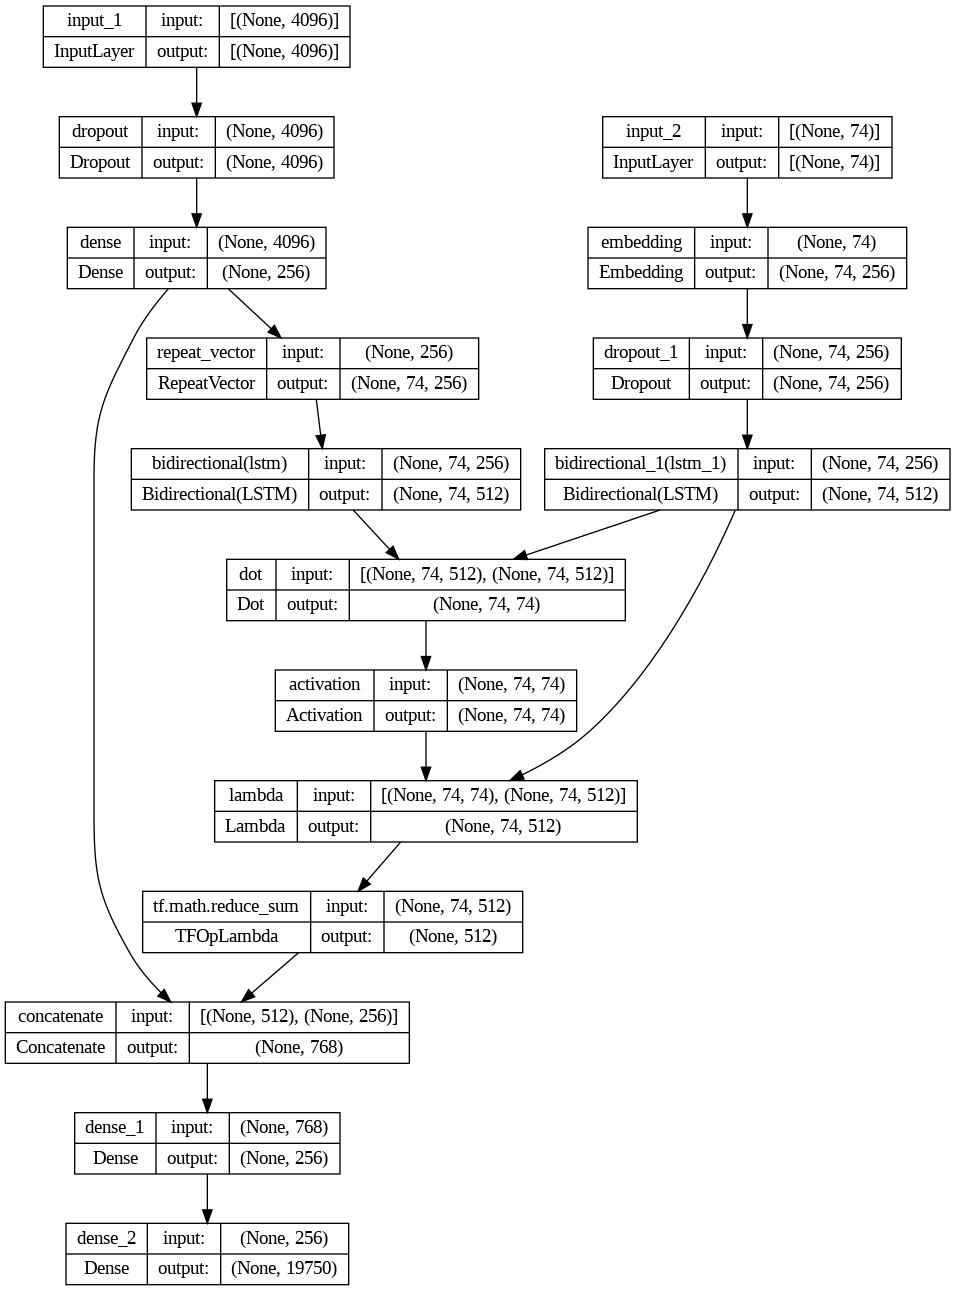

In [20]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

##### **Loading `Features`**

* Next, we load the `Extracted Image Features` that we earlier stored as a `Pickle` file.

In [21]:
# Loading the Features
import pickle

# Open the file in read-binary mode
with open('/content/drive/My Drive/Flickr30k_Dataset_preprocessed/img_features.pkl', 'rb') as file:
    loaded_features = pickle.load(file)

##### **Training `Parameters`**

* **`epochs = 50`**: This sets the number of epochs for `training`. An epoch is one complete pass through the `entire` training dataset. So, the model will be trained over the entire dataset `50` times.

* **`batch_size = 32`**: This sets the size of the `batch`. A batch is a `subset` of the training data. Instead of updating the model’s `weights` after each training example, it’s done after a batch of `32` examples. This can make the training process more `efficient`.

* **`steps_per_epoch = ceil(len(train) / batch_size)`**: This calculates the number of `steps` per epoch. Each step involves feeding `one batch` of data to the model and updating the `weights`. The ceil function rounds up to ensure that even if the last batch is smaller, it still counts as a separate step.

* **`validation_steps = ceil(len(test) / batch_size)`**: Similarly, this calculates the number of `steps` needed for `validating` the model on the test data.

'

* In simple terms, this code is setting up how many times and how quickly the model will learn from the data.

In [22]:
from math import ceil


# Set the number of epochs, batch size
epochs = 50
batch_size = 32

# Calculate the steps_per_epoch based on the number of batches in one epoch
steps_per_epoch = ceil(len(train) / batch_size)
validation_steps = ceil(len(test) / batch_size)  # Calculate the steps for validation data


##### **Model `Training`**

Here is the explanation about `Training` process in the code below:

1. **`for epoch in range(epochs)`**: 

* This starts a `loop` that will run for the number of epochs specified earlier. 
* Each epoch is a complete pass through the training dataset.

2. **`print(f"Epoch {epoch+1}/{epochs}")`**: 

* This prints the `current` epoch number to keep track of the training `progress`.

3. **`train_generator = data_generator(...)`**: 

* This sets up a `generator` for the training data. 
* A `generator` is a special type of function that allows you to iterate over a `large dataset` without loading all of it into memory at once.

4. **`test_generator = data_generator(...)`**: 

* Similarly, this sets up a generator for the `test` data.

5. **`model.fit(...)`**: 

* This is where the actual `training` happens. 
* The model learns from the training data in batches, updates its weights, and then validates its performance on the test data.
    * **`train_generator`**: This is the training `data` that the model will learn from.
    * **`epochs=1`**: This means that for each epoch in our outer loop, we do one pass over the training data.
    * **`steps_per_epoch=steps_per_epoch`**: This is the total number of steps (`batches` of samples) to yield from the generator before declaring one epoch finished and starting the next epoch.
    * **`validation_data=test_generator`**: This is the test data that the model will validate on after learning from the training data.
    * **`validation_steps=validation_steps`**: This is the total number of steps (batches of samples) to yield from the validation_data generator before stopping at the end of every epoch.
    * **`verbose=1`**: This means that we want to see `detailed `output during training (like loss, accuracy, etc.).

![Image](https://volcanohong.github.io/content/images/2016/ml_process.png)
'

* In simple terms, this code is running a loop for each epoch, where it trains the model on the training data and then checks how well it’s doing on the test data.

In [23]:
import numpy as np

# Loop through the epochs for training
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Set up data generators
    train_generator = data_generator(train, image_to_captions_mapping, loaded_features, tokenizer, max_caption_length, vocab_size, batch_size)
    test_generator = data_generator(test, image_to_captions_mapping, loaded_features, tokenizer, max_caption_length, vocab_size, batch_size)

    model.fit(train_generator, epochs=1, steps_per_epoch=steps_per_epoch,
                validation_data=test_generator, validation_steps=validation_steps,
                verbose=1)

Epoch 1/50
894/894 [==============================] - 205s 212ms/step - loss: 6.4875 - val_loss: 6.5619
Epoch 2/50
894/894 [==============================] - 183s 205ms/step - loss: 5.5186 - val_loss: 6.4958
Epoch 3/50
894/894 [==============================] - 184s 205ms/step - loss: 5.1648 - val_loss: 6.5900
Epoch 4/50
894/894 [==============================] - 182s 203ms/step - loss: 4.8574 - val_loss: 6.5966
Epoch 5/50
894/894 [==============================] - 179s 200ms/step - loss: 4.5703 - val_loss: 6.6284
Epoch 6/50
894/894 [==============================] - 181s 203ms/step - loss: 4.4095 - val_loss: 6.8717
Epoch 7/50
894/894 [==============================] - 181s 203ms/step - loss: 4.2455 - val_loss: 7.2224
Epoch 8/50
894/894 [==============================] - 180s 202ms/step - loss: 4.1220 - val_loss: 7.3627
Epoch 9/50
894/894 [==============================] - 180s 201ms/step - loss: 3.9759 - val_loss: 7.3646
Epoch 10/50
894/894 [==============================] - 178s 199m

##### **`Saving` the Model**

* Next in the line is `saving` the trained model to a file so that it can be loaded and used later without having to retrain it:

1. **`MODEL_OUTPUT_DIR = "/content/drive/My Drive/Model/"`**: This sets the `directory` where the model will be saved. In this case, it’s a folder named `Model` in the `Google Drive`.

2. **`model.save(MODEL_OUTPUT_DIR+'caption_generation_model.h5')`**: This saves the model to a file named `caption_generation_model.h5` in the specified directory. The .`h5` extension indicates that the model is saved in the `HDF5` format, which is a common format for storing `large amounts` of numerical data like the `weights` of a neural network.

* In simple terms, this code is `saving` our `trained model` for future use. This way, we don’t have to train it again every time you want to generate captions. We can just load this `saved` model and start generating captions right away.


In [24]:
MODEL_OUTPUT_DIR = "/content/drive/My Drive/Model/"

model.save(MODEL_OUTPUT_DIR+'caption_generation_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'''

### **2. Captions Generation**

* Now that we have Trained our `Image Captioner` model, it's time to write a `evaluate` our model.

Let's do this sequentially:

1. **`get_word_from_index`**: 

* This function, get_word_from_index, takes two inputs: an `index` and a `tokenizer`. The tokenizer is a tool that has been used to convert words to `numerical` indices.

* The function goes through the tokenizer’s `word-to-index` mapping (tokenizer.word_index.items()), which is a list of pairs where each pair contains a `word` and its corresponding `index`. It looks for the pair where the index (idx) matches the input index.

* If it finds such a pair, it `returns` the corresponding `word` (word). If it doesn’t find any match, it returns `None`.

'

* In simple terms, this function is used to `find` the original `word` that corresponds to a given index in the tokenizer’s `word-to-index` mapping. It’s like looking up a word in a dictionary using its numerical index. If the index doesn’t exist in the dictionary, it returns `None`.

In [25]:
def get_word_from_index(index, tokenizer):
    return next((word for word, idx in tokenizer.word_index.items() if idx == index), None)

2. **`predict_caption`**:

* This function, predict_caption, is used to generate a caption for an image. 

Here’s a simple explanation:

* **`caption = 'startseq'`**: This initializes the caption with a starting sequence tag `startseq`.

* **`for _ in range(max_caption_length)`**: This starts a loop that will run for the maximum caption length.

* **`sequence = tokenizer.texts_to_sequences([caption])[0]`**: This converts the current caption into a sequence of `token` indices using the tokenizer.

* **`sequence = pad_sequences([sequence], maxlen=max_caption_length)`**: This `pads` the sequence with zeros to ensure it has the same length as the maximum caption length.

* **`yhat = model.predict([image_features, sequence], verbose=0)`**: This `predicts` the next word in the caption given the image features and the current sequence. The prediction is a probability distribution over all possible words.

* **`predicted_index = np.argmax(yhat)`**: This gets the `index` of the word with the highest probability.

* **`predicted_word = get_word_from_index(predicted_index, tokenizer)`**: This converts the predicted index back into a `word` using the tokenizer.

* **`caption += " " + predicted_word`**: This appends the predicted word to the `caption`.

* The `loop` continues until it reaches the `maximum` caption length, or until it predicts either `None` or an ending sequence tag `endseq`.

* Finally, it returns the `generated` caption.

'

* In simple terms, this function is `generating` a caption for an image by predicting one word at a time until it reaches a specified maximum `length` or an end sequence tag.

In [26]:
def predict_caption(model, image_features, tokenizer, max_caption_length):
    # Initialize the caption sequence
    caption = 'startseq'

    # Generate the caption
    for _ in range(max_caption_length):
        # Convert the current caption to a sequence of token indices
        sequence = tokenizer.texts_to_sequences([caption])[0]
        # Pad the sequence to match the maximum caption length
        sequence = pad_sequences([sequence], maxlen=max_caption_length)
        # Predict the next word's probability distribution
        yhat = model.predict([image_features, sequence], verbose=0)
        # Get the index with the highest probability
        predicted_index = np.argmax(yhat)
        # Convert the index to a word
        predicted_word = get_word_from_index(predicted_index, tokenizer)

        # Append the predicted word to the caption
        caption += " " + predicted_word

        # Stop if the word is None or if the end sequence tag is encountered
        if predicted_word is None or predicted_word == 'endseq':
            break

    return caption

##### **`Evaluating` model**

This code below is `comparing` the captions `predicted` by the model with the `actual` captions for images in the test dataset:

* **`actual_captions_list = [] and predicted_captions_list = []`**: These lines initialize `two empty lists` to store the actual and predicted captions.

* **`for key in tqdm(test)`**: This starts a loop over the `test` data. The tqdm function is used to show a progress bar.

* **`actual_captions = image_to_captions_mapping[key]`**: This gets the `actual` captions for the current image.

* **`predicted_caption = predict_caption(model, loaded_features[key], tokenizer, max_caption_length)`**: This `predicts` a caption for the current image using the model.

* **`actual_captions_words = [caption.split() for caption in actual_captions] and predicted_caption_words = predicted_caption.split()`**: These lines `split` the actual and predicted captions into individual `words`.

* **`actual_captions_list.append(actual_captions_words) and predicted_captions_list.append(predicted_caption_words)`**: These lines add the `lists` of words from the `actual` and `predicted` captions to their respective lists.

'

* In simple terms, this code is `testing` how well the model’s `generated captions` match with the `actual captions` for each image in the test dataset.

In [27]:
# Initialize lists to store actual and predicted captions
actual_captions_list = []
predicted_captions_list = []

In [28]:
# Loop through the test data
for key in tqdm(test):
    # Get actual captions for the current image
    actual_captions = image_to_captions_mapping[key]
    # Predict the caption for the image using the model
    predicted_caption = predict_caption(model, loaded_features[key], tokenizer, max_caption_length)

    # Split actual captions into words
    actual_captions_words = [caption.split() for caption in actual_captions]
    # Split predicted caption into words
    predicted_caption_words = predicted_caption.split()

    # Append to the lists
    actual_captions_list.append(actual_captions_words)
    predicted_captions_list.append(predicted_caption_words)

100%|██████████| 3179/3179 [45:32<00:00,  1.16it/s]


##### **`BLEU`**

* `BLEU`, which stands for `Bilingual Evaluation Understudy`, is a metric used to `evaluate` the quality of text that has been translated by a machine. It was invented at IBM in 2001.

* The central idea behind `BLEU` is that **"the closer a machine translation is to a professional human translation, the better it is"**. It does this by `comparing` the machine-generated text to one or more `reference` texts, which are high-quality translations made by humans.

* `BLEU` looks at `n-grams` - `sequences` of n words in the text. For example, in the sentence “I love dogs”, “I love” and “love dogs” are 2-grams. `BLEU` counts how many `n-grams` in the machine-generated text also appear in the reference text.

* The `BLEU` score is always a number between `0` and `1`. A score of `1` means that the machine-generated text is `identical` to one of the reference texts, while a score of `0` means there’s `no overlap` at all. However, even human translators rarely score a perfect 1, because there’s often more than one correct way to translate a sentence.

* There are different `versions` of `BLEU`, like BLEU-1, BLEU-2, etc., which consider different `lengths` of `n-grams`. For example, `BLEU-1` looks only at `individual` words (1-grams), while `BLEU-2` considers `pairs` of words (2-grams).

* One important thing to note is that `BLEU` only looks at the `overlap` of words and phrases. It doesn’t consider whether the translation makes sense or is grammatically correct. So while it’s a useful tool for comparing different machine translation systems, it doesn’t tell the whole story about their quality.

![Image](https://miro.medium.com/max/552/1*kLi2vOdAUxzn7SCVJ5EJoQ.png)


This code is calculating the `BLEU` score:

1. **`from nltk.translate.bleu_score import corpus_bleu`**: 

* This line `imports` the `corpus_bleu` function from the nltk.translate.bleu_score module. 
* `NLTK` (Natural Language Toolkit) is a library for working with human language data and `corpus_bleu` is a function that calculates the `BLEU` score.

2. **`print("BLEU-1: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(1.0, 0, 0, 0)))`**: 

* This line `calculates` and prints the `BLEU-1` score. 
* The BLEU-1 score only considers `individual` words in the calculation. The weights=(1.0, 0, 0, 0) argument means that it only considers `1-gram` (single word) matches.

3. **`print("BLEU-2: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(0.5, 0.5, 0, 0)))`**: 

* This line `calculates` and prints the `BLEU-2` score. 
* The BLEU-2 score considers `pairs` of words in the calculation. 
* The weights=(0.5, 0.5, 0, 0) argument means that it considers both `1-gram` and `2-gram` (two consecutive words) matches equally.

'

* In simple terms, this code is `comparing` the captions `generated` by the model with the `actual` captions and calculating a `score` that indicates how similar they are.

In [29]:
# For checking score
from nltk.translate.bleu_score import corpus_bleu

# Calculate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(0.5, 0.5, 0, 0)))

BLEU-1: 0.434374
BLEU-2: 0.181848


***
***

## **C. Predicting Captions from Images** <a id="3"></a>

* Let's now see how `accurate` and `readable` captions our model actually generates compared to `actual` captions.

Here's the function that will help us: 

1. **`image_id = image_name.split('.')[0]`**: 

* This line gets the `ID` of the `image` by splitting the image name at the period and taking the first part. 
* This assumes that the image name is in the format `id.extension`.

2. **`img_path = os.path.join("/content/drive/My Drive/Flickr30k_Dataset/Images/", image_name)`**: 

* This line creates the `full path` to the image file by joining the directory path with the image name.

3. **`image = Image.open(img_path)`**: 

* This line `opens` the image `file` using the Python Imaging Library (PIL).

4. **`captions = image_to_captions_mapping[image_id]`**: 

* This line gets the `actual` captions for this image from a dictionary `image_to_captions_mapping` where keys are image IDs and values are lists of captions.

5. **`y_pred = predict_caption(model, loaded_features[image_id], tokenizer, max_caption_length)`**: 

* This line `generates` a predicted `caption` for this image using the predict_caption function defined earlier.

6. **`plt.imshow(image)`**: 

* This line `displays` the `image` using matplotlib’s imshow function.

'

* In simple terms, this function takes an `image` name as `input`, `displays` its `actual` and `predicted` captions, and shows the `image`.

In [30]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Function for generating caption
def generate_caption(image_name):
    # load the image
    image_id = image_name.split('.')[0]
    img_path = os.path.join("/content/drive/My Drive/Flickr30k_Dataset/Images/", image_name)
    image = Image.open(img_path)
    captions = image_to_captions_mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, loaded_features[image_id], tokenizer, max_caption_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq man wearing yellow shirt and black apron is standing in front of an information booth with some newspapers endseq
startseq an elderly africanamerican man in yellow shirt is standing in front of an information stand endseq
startseq man selling or delivering newspapers stands in front of spanishlanguage information sign endseq
startseq man with newspaper cart is standing in front of an information sign endseq
startseq man in yellow shirt and black apron delivering newspapers endseq
--------------------Predicted--------------------
startseq woman in red shirt is holding small boy in blue hoodie doing clean up their clean some buildings endseq


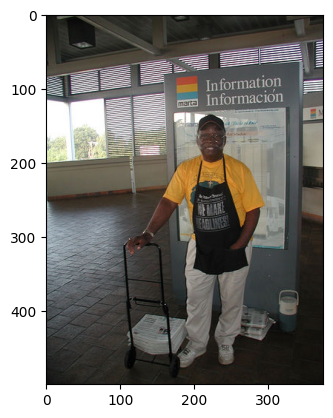

In [31]:
generate_caption("148284.jpg")

---------------------Actual---------------------
startseq the players of the baseball team are standing on the field with many people watching from the stands endseq
startseq baseball players are playing on field in stadium filled with people endseq
startseq team plays baseball at large crowded stadium endseq
startseq crowd cheers on baseball team endseq
startseq game is playing in the stadium endseq
--------------------Predicted--------------------
startseq man is doing skateboard trick endseq


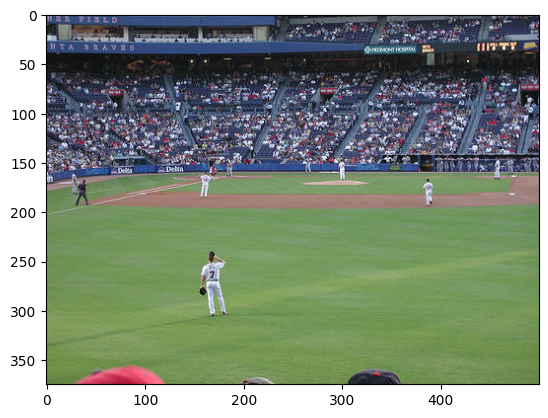

In [32]:
generate_caption("134206.jpg")

---------------------Actual---------------------
startseq man does acrobatics outside of middle eastern style building endseq
startseq man is upside down on an outside gymnastics bar endseq
startseq the man is flipping over the bar endseq
startseq man is upsidedown on pole endseq
startseq man doing gymnastic stunts endseq
--------------------Predicted--------------------
startseq man in blue shirt and gray jeans is work at picture of structure endseq


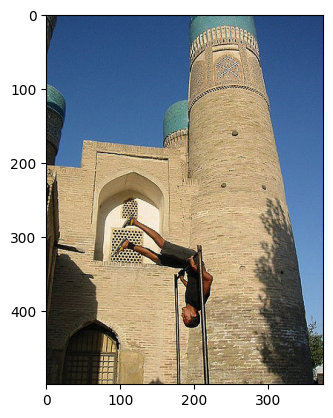

In [33]:
generate_caption("81641.jpg")

---------------------Actual---------------------
startseq bearded man and girl in red dress are getting married endseq
startseq the group of people are assembling for wedding endseq
startseq man and woman dressed for wedding function endseq
startseq woman holds man arm at formal event endseq
startseq wedding party walks out of building endseq
--------------------Predicted--------------------
startseq bride and groom taking picture of busy street endseq


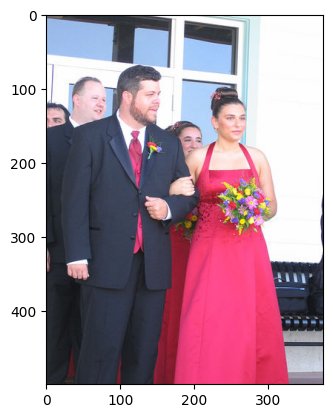

In [34]:
generate_caption("65567.jpg")

---------------------Actual---------------------
startseq group of friends playing cards and trying to bluff each other into making terrible mistake endseq
startseq group of college students gathers to play texas hold em poker endseq
startseq several men play cards while around green table endseq
startseq group of several men playing poker endseq
startseq six white males playing poker endseq
--------------------Predicted--------------------
startseq man is reading traffic endseq


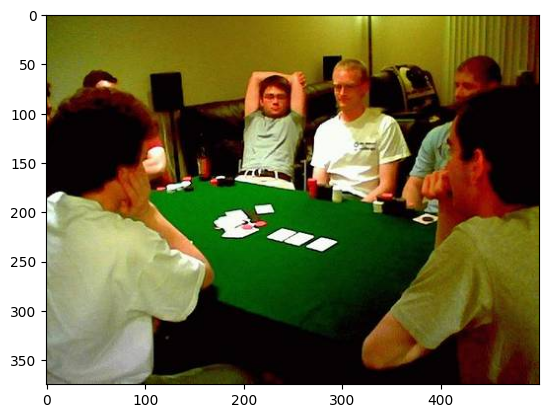

In [35]:
generate_caption("36979.jpg")

'''

### **Conclusion**

* The `model` isn't that great and can be considered `mediocre` but it still predicts some of the objects accurately.

* This is `expected` as we built a pretty `simple model` and trained for only 50 epochs on such a `large Dataset` with added complexity due to `Data Augmentation`.

'

* One way to `improve` the model's `performance` is to either : 

1. `Train` it for `longer`, 

or better yet,

2. `Fine Tune` a Pre-trained model (such as `VGG16` and `Yolo`) for this task.

***
***